In [4]:
!pip install --upgrade scikit-learn xgboost

In [5]:
#  XGBoost model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
import lightgbm as lgb
from sklearn.preprocessing import LabelBinarizer

In [6]:
a=pd.read_csv('Titanic_test.csv')
b=pd.read_csv('Titanic_train.csv')



In [7]:
c=pd.concat([a,b],ignore_index=True)
c.to_csv('titanic_csv',index=False)

In [8]:
df=pd.read_csv('titanic_csv')
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,NaN
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,NaN
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NaN


In [9]:
df[df.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [13]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Survived']=df['Survived'].fillna(df['Survived'].median())

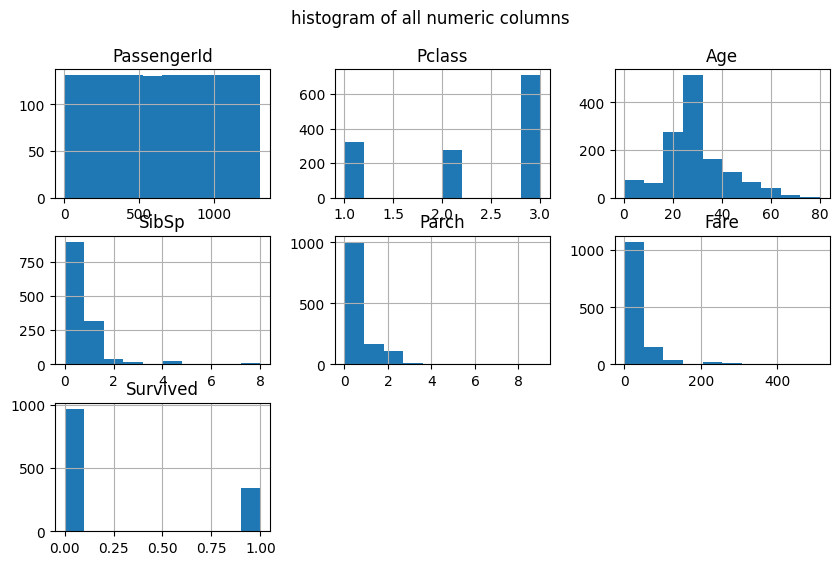

In [14]:
df.hist(bins=10, figsize=(10,6))
plt.suptitle('histogram of all numeric columns')
plt.show()

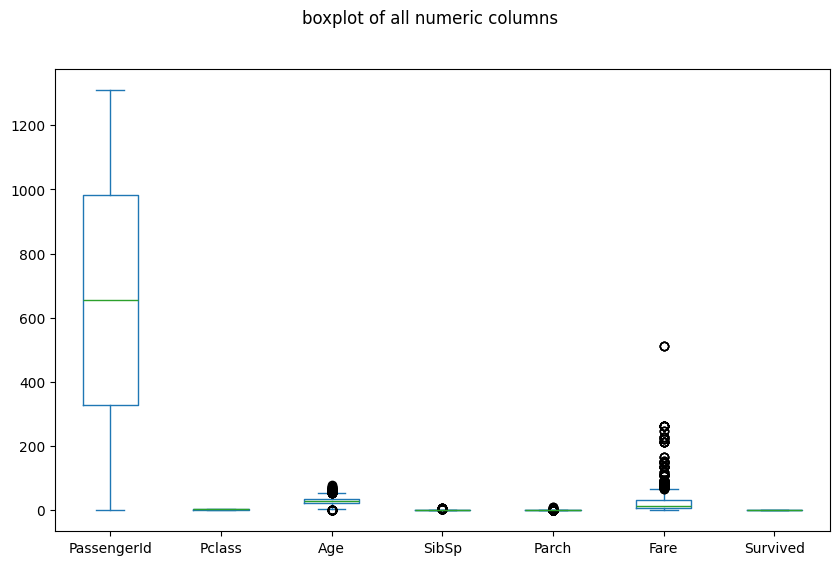

In [15]:
df.plot(kind='box',figsize=(10,6))
plt.suptitle('boxplot of all numeric columns')
plt.show()

In [16]:
#handle outliers
df['Age']=np.log1p(df['Age'])
df['SibSp']=np.log1p(df['SibSp'])
df['Parch']=np.log1p(df['Parch'])
df['Fare']=np.log1p(df['Fare'])

In [17]:
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df['Cabin']=le.fit_transform(df['Cabin'])


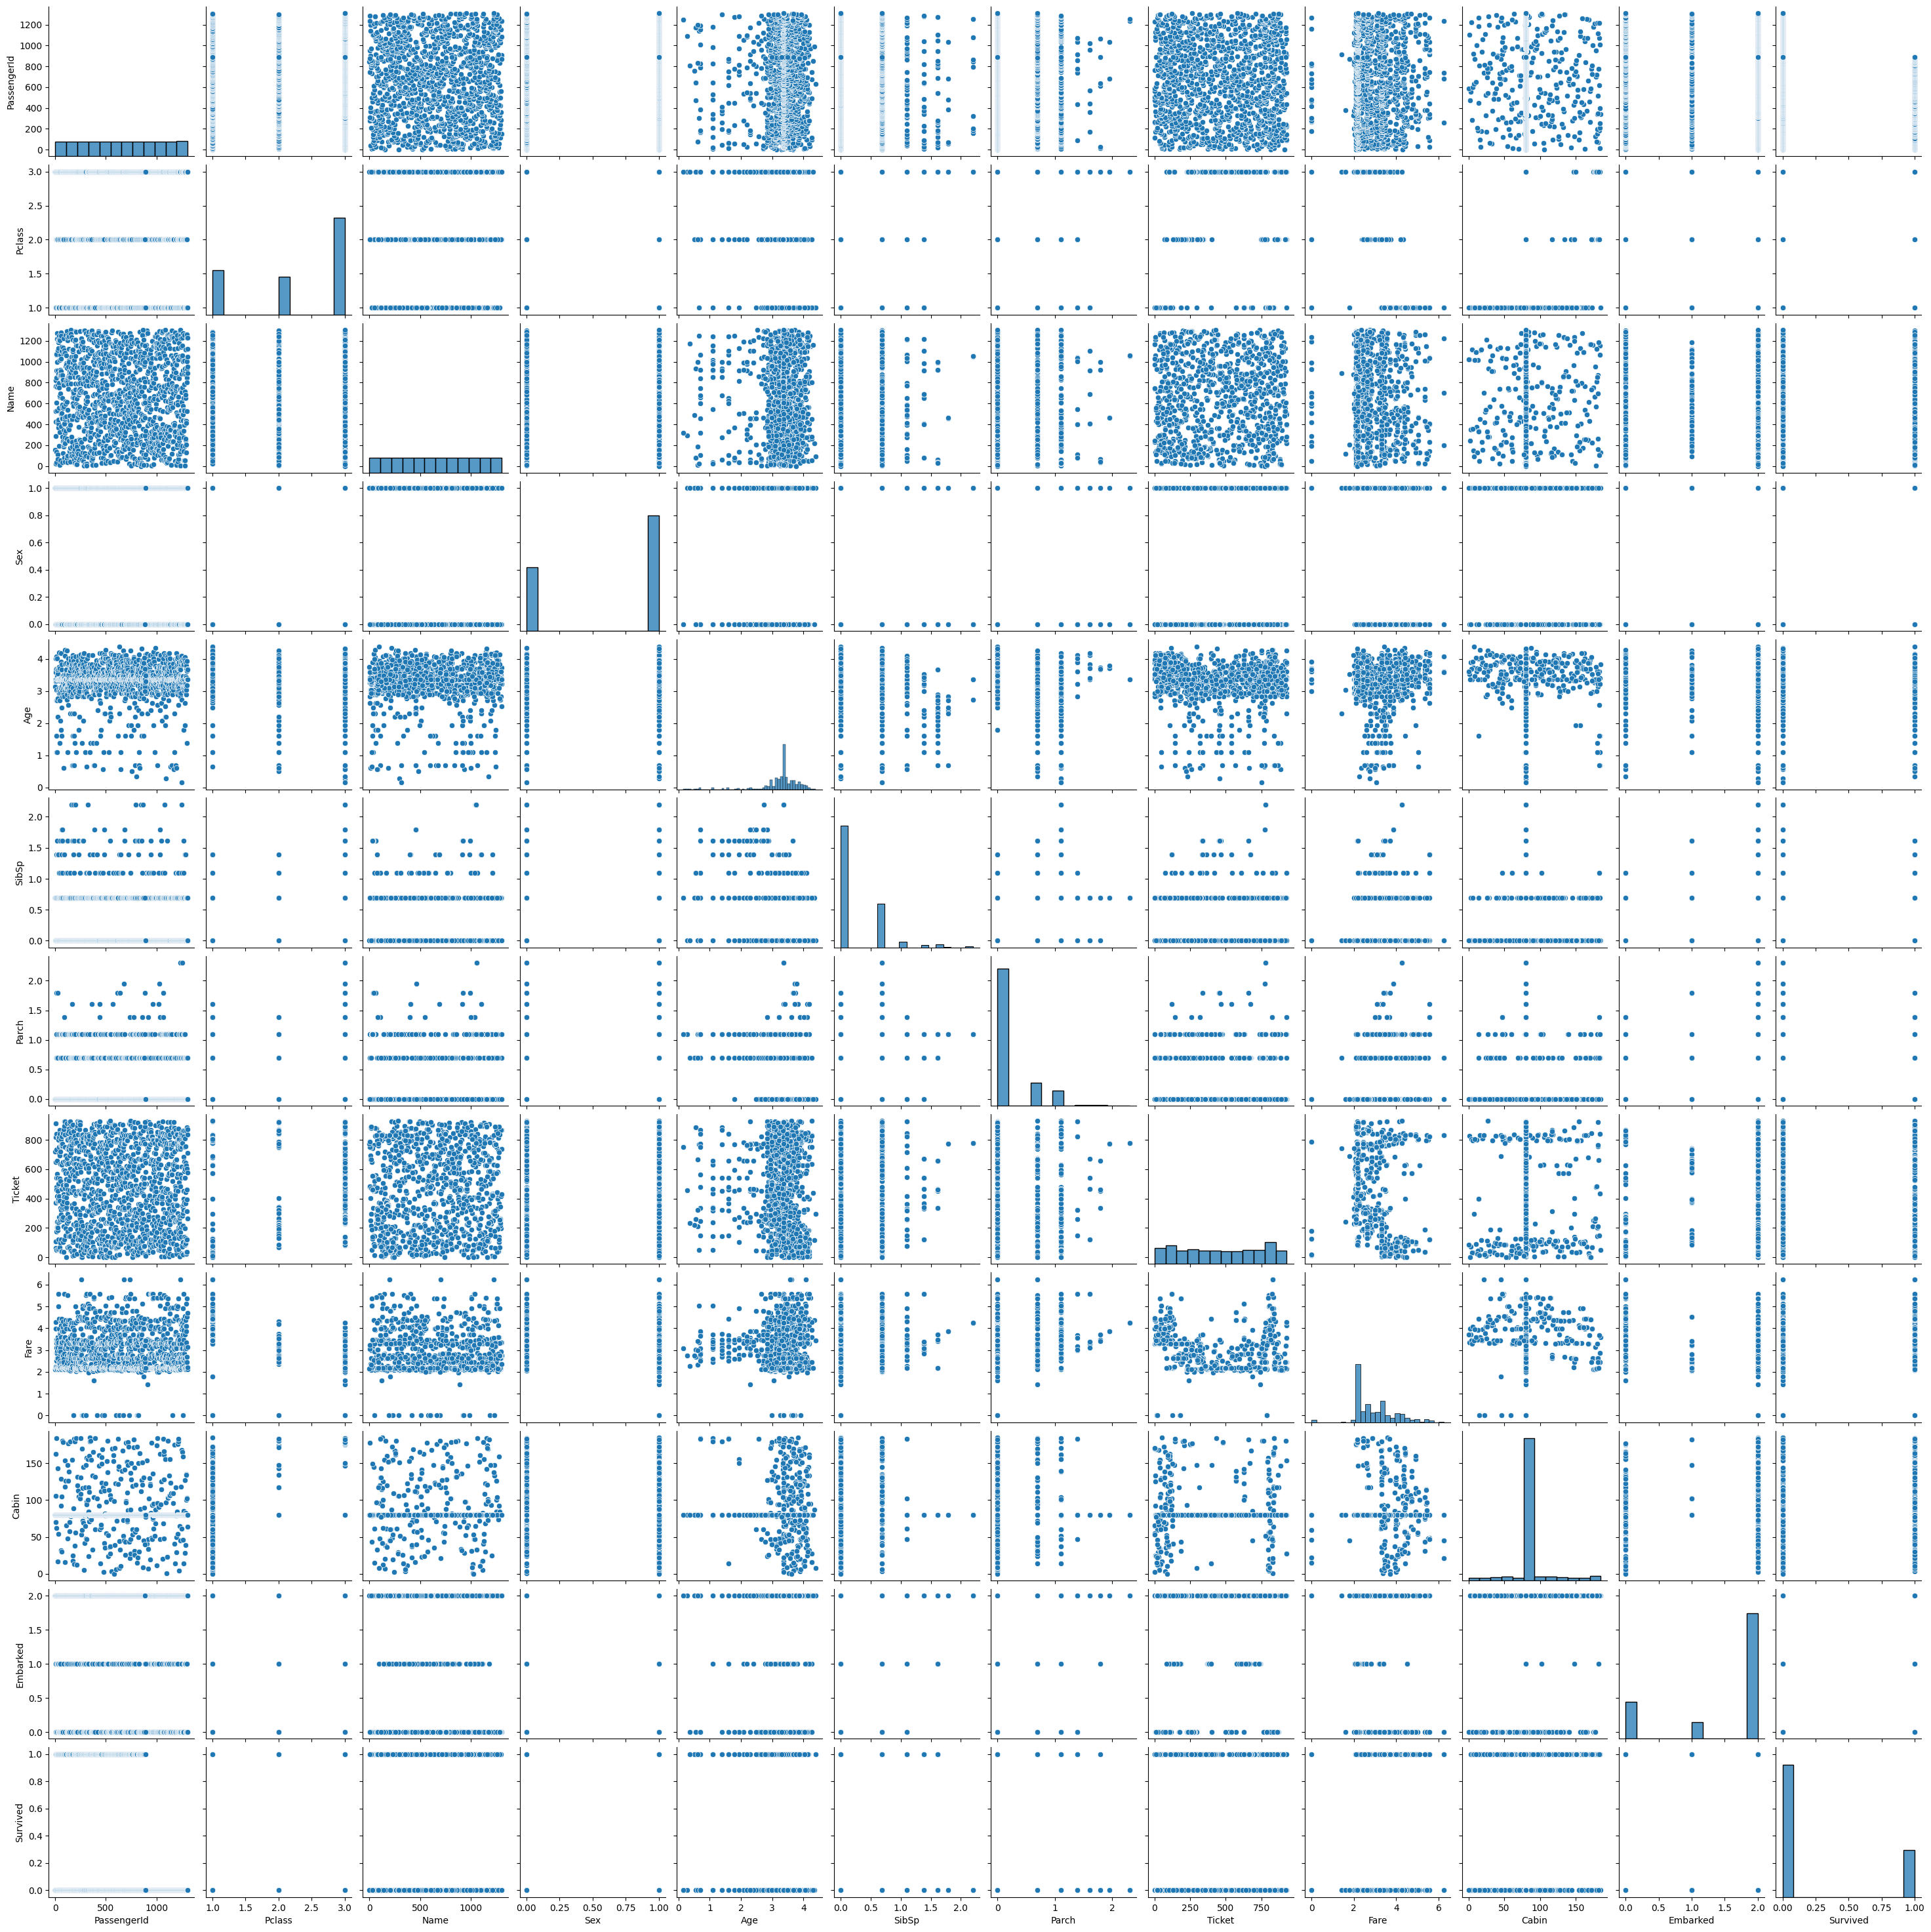

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,638,1,3.569533,0.000000,0.000000,376,2.178064,80,1,0.0
1,893,3,1266,0,3.871201,0.693147,0.000000,582,2.079442,80,2,0.0
2,894,2,837,1,4.143135,0.000000,0.000000,184,2.369075,80,1,0.0
3,895,3,1278,1,3.332205,0.000000,0.000000,366,2.268252,80,2,0.0
4,896,3,543,0,3.135494,0.693147,0.693147,338,2.586824,80,2,0.0


In [20]:
x=df.iloc[:,0:11]
y=df.iloc[:,11]


In [21]:
seed=7
test_size=0.33
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=seed)

In [22]:
model=XGBClassifier()
model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [23]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[309  24]
 [ 31  68]]
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       333
         1.0       0.74      0.69      0.71        99

    accuracy                           0.87       432
   macro avg       0.82      0.81      0.82       432
weighted avg       0.87      0.87      0.87       432



In [25]:
accuracy_score(y_test,y_pred)

0.8726851851851852

In [26]:
#light GBM
import lightgbm as lgb
d_train=lgb.Dataset(x_train,label=y_train)

In [27]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [28]:
clf=lgb.train(params,d_train,100)

[LightGBM] [Info] Number of positive: 243, number of negative: 634
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 877, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.277081 -> initscore=-0.958988
[LightGBM] [Info] Start training from score -0.958988


In [29]:
y_preds=clf.predict(x_test)

In [30]:
preds=[round(value) for value in y_preds]
preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
accuracy_score(y_test,preds)

0.7708333333333334

In [32]:
y_preds

array([0.25341295, 0.29566062, 0.25131877, 0.21431278, 0.29882852,
       0.30980058, 0.28871966, 0.32601856, 0.24398979, 0.24996962,
       0.2795192 , 0.24202501, 0.24364784, 0.25844672, 0.24535513,
       0.23410155, 0.2259978 , 0.2340067 , 0.32835184, 0.21899176,
       0.32601856, 0.21473715, 0.24223664, 0.25684373, 0.31192327,
       0.21431168, 0.31565388, 0.29893281, 0.29677406, 0.25373415,
       0.26503177, 0.28397088, 0.2445998 , 0.30872061, 0.23927212,
       0.34032701, 0.29946284, 0.26334177, 0.30502085, 0.22664582,
       0.24938883, 0.23334378, 0.24223664, 0.24078728, 0.27784489,
       0.21409308, 0.253512  , 0.30027662, 0.27509795, 0.24489717,
       0.27546275, 0.23204932, 0.29593361, 0.23499952, 0.37883581,
       0.23233228, 0.41189283, 0.28258169, 0.26506613, 0.39873582,
       0.23175398, 0.22866101, 0.23009023, 0.24905536, 0.31931024,
       0.31126809, 0.24401457, 0.32250395, 0.28513465, 0.25250574,
       0.23208025, 0.25117303, 0.23268845, 0.33627948, 0.35010

In [33]:
#  Cross-validation setup

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
# Hyperparameter tuning grids

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

xgb_param = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

lgb_param = {
    'n_estimators': [100, 200, 400],
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}


In [35]:
#  RandomizedSearchCV for tuning

print("Tuning XGBoost...")
xgb_cv = RandomizedSearchCV(xgb, xgb_param, cv=cv, scoring='f1', n_iter=10, n_jobs=-1, verbose=1, random_state=42)
xgb_cv.fit(x_train, y_train)
best_xgb = xgb_cv.best_estimator_
print("Best XGBoost Params:", xgb_cv.best_params_)

print("\nTuning LightGBM...")
lgb_cv = RandomizedSearchCV(lgbm, lgb_param, cv=cv, scoring='f1', n_iter=10, n_jobs=-1, verbose=1, random_state=42)
lgb_cv.fit(x_train, y_train)
best_lgb = lgb_cv.best_estimator_
print("Best LightGBM Params:", lgb_cv.best_params_)

Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:09:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Tuning LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 243, number of negative: 634
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 877, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.277081 -> initscore=-0.958988
[LightGBM] [Info] Start training from score -0.958988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [36]:
#  Cross-validated predictions

def evaluate_model(model, X, y, cv):
    preds = cross_val_predict(model, X, y, cv=cv, method='predict')
    probs = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:,1]
    acc = accuracy_score(y, preds)
    prec = precision_score(y, preds)
    rec = recall_score(y, preds)
    f1 = f1_score(y, preds)
    print(classification_report(y, preds))
    return preds, probs, acc, prec, rec, f1

print("\nEvaluating tuned XGBoost:")
y_pred_xgb, y_prob_xgb, acc_xgb, prec_xgb, rec_xgb, f1_xgb = evaluate_model(best_xgb, x, y, cv)

print("\nEvaluating tuned LightGBM:")
y_pred_lgb, y_prob_lgb, acc_lgb, prec_lgb, rec_lgb, f1_lgb = evaluate_model(best_lgb, x, y, cv)


Evaluating tuned XGBoost:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:09:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:09:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:09:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:09:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:09:59] WARNING: /w

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       967
         1.0       0.80      0.70      0.75       342

    accuracy                           0.88      1309
   macro avg       0.85      0.82      0.83      1309
weighted avg       0.87      0.88      0.87      1309


Evaluating tuned LightGBM:
[LightGBM] [Info] Number of positive: 274, number of negative: 773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261700 -> initscore=-1.037151
[LightGBM] [Info] Start training from score -1.037151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [37]:
# Compare model metrics

metrics_df = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'Accuracy': [acc_xgb, acc_lgb],
    'Precision': [prec_xgb, prec_lgb],
    'Recall': [rec_xgb, rec_lgb],
    'F1-Score': [f1_xgb, f1_lgb]
})
print("\nModel Performance Comparison:")
display(metrics_df)


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.876241,0.800000,0.701754,0.747664
1,LightGBM,0.876241,0.792208,0.713450,0.750769


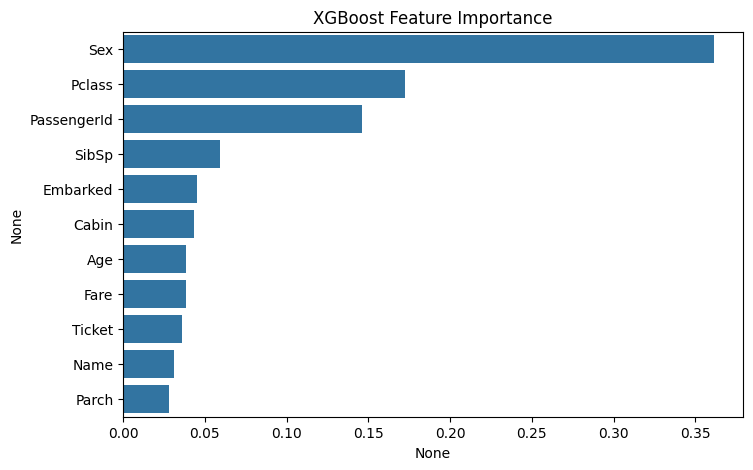

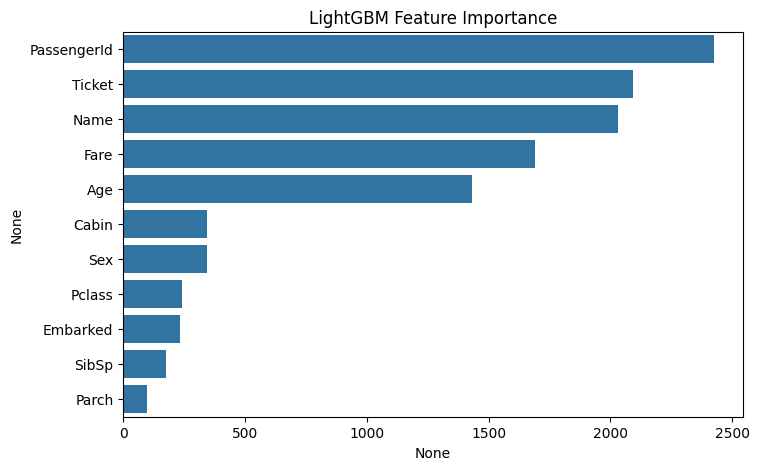

In [38]:
#  Feature Importance plots
def plot_feature_importance(model, title):
    importance = model.feature_importances_
    feat_names = x.columns
    feat_imp = pd.Series(importance, index=feat_names).sort_values(ascending=False)[:15]
    plt.figure(figsize=(8,5))
    sns.barplot(x=feat_imp, y=feat_imp.index)
    plt.title(title)
    plt.show()

plot_feature_importance(best_xgb, "XGBoost Feature Importance")
plot_feature_importance(best_lgb, "LightGBM Feature Importance")

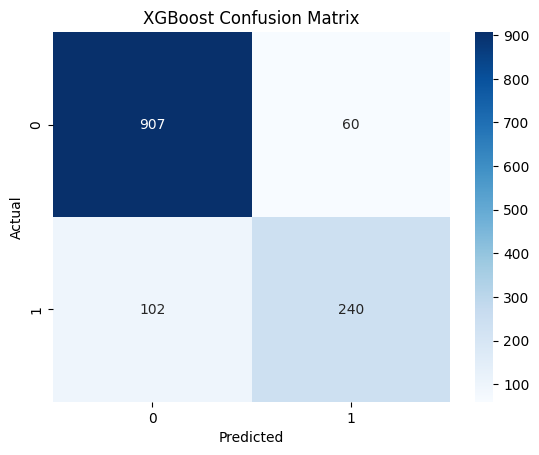

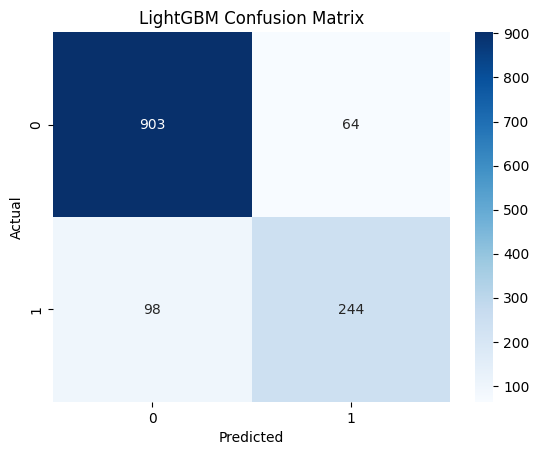

In [39]:
# Confusion Matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y, y_pred_xgb, "XGBoost Confusion Matrix")
plot_confusion_matrix(y, y_pred_lgb, "LightGBM Confusion Matrix")

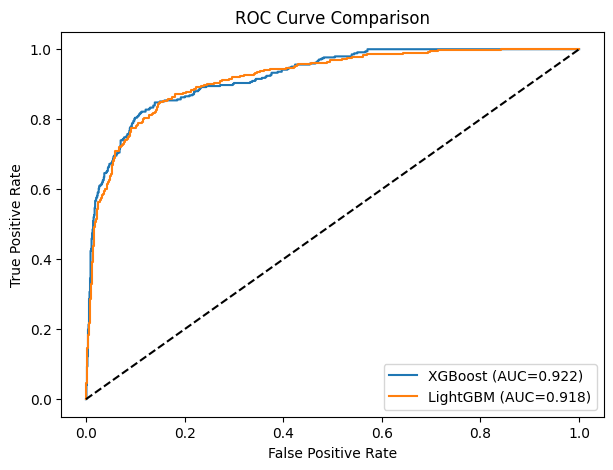

In [40]:
# ROC Curve

fpr_xgb, tpr_xgb, _ = roc_curve(y, y_prob_xgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y, y_prob_lgb)

plt.figure(figsize=(7,5))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc(fpr_xgb, tpr_xgb):.3f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC={auc(fpr_lgb, tpr_lgb):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()